In [1]:
import csv

# specify the input and output file names
input_file = 'HeartDisease_dataset.csv'
output_file1 = 'HeartDisease_train.csv'
output_file2 = 'HeartDisease_test.csv'

# open the input file and read the data into a list
with open(input_file, 'r') as input_file:
    data = list(csv.reader(input_file))

# get the column names from the first row of the input file
column_names = data[0]

# calculate the number of rows for each output file
num_rows = len(data)
output1_rows = int(num_rows * 0.8)
output2_rows = num_rows - output1_rows

# write the column names and data to the first output file
with open(output_file1, 'w', newline='') as output_file:
    writer = csv.writer(output_file)
    writer.writerow(column_names)
    writer.writerows(data[1:output1_rows+1])

# write the column names and data to the second output file
with open(output_file2, 'w', newline='') as output_file:
    writer = csv.writer(output_file)
    writer.writerow(column_names)
    writer.writerows(data[output1_rows+1:])


# Training data

In [2]:
import pandas as pd
df_train = pd.read_csv('HeartDisease_train.csv')

In [3]:
# Understanding about the features/attributes
df_train.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia', 'target'],
      dtype='object')

we have 14 features where 13 are independent and 1 is dependent variable.

Data Description
1. age: age in years
2. sex: sex (male;female)
3. cp: chest pain type
    1. typical angina
    2. atypical angina
    3. non-anginal pain
    4.  asymptomatic
4.trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl)
7. restecg: resting electrocardiographic results
    1. normal
    2. having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    3. showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    1. upsloping
    2. flat
    3. downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. condition

In [4]:
# Information about data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            820 non-null    int64  
 1   sex                            820 non-null    object 
 2   chest_pain_type                820 non-null    object 
 3   resting_blood_pressure         820 non-null    int64  
 4   cholestoral                    820 non-null    int64  
 5   fasting_blood_sugar            820 non-null    object 
 6   rest_ecg                       820 non-null    object 
 7   Max_heart_rate                 820 non-null    int64  
 8   exercise_induced_angina        820 non-null    object 
 9   oldpeak                        820 non-null    float64
 10  slope                          820 non-null    object 
 11  vessels_colored_by_flourosopy  820 non-null    object 
 12  thalassemia                    820 non-null    obj

# Exploratory Data Analysis

The main purpose of EDA is to help look at data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data, detect outliers

In [5]:
df_train.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000
mean,54.450000,131.718293,247.360976,149.131707,1.064512,0.520732
std,9.204962,17.882397,52.651980,23.022200,1.184937,0.499875
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.000000,120.000000,211.000000,133.000000,0.000000,0.000000
50%,56.000000,130.000000,243.000000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,278.750000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,1.000000


# Histogram Plots

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'resting_blood_pressure'}>],
       [<AxesSubplot:title={'center':'cholestoral'}>,
        <AxesSubplot:title={'center':'Max_heart_rate'}>],
       [<AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'target'}>]], dtype=object)

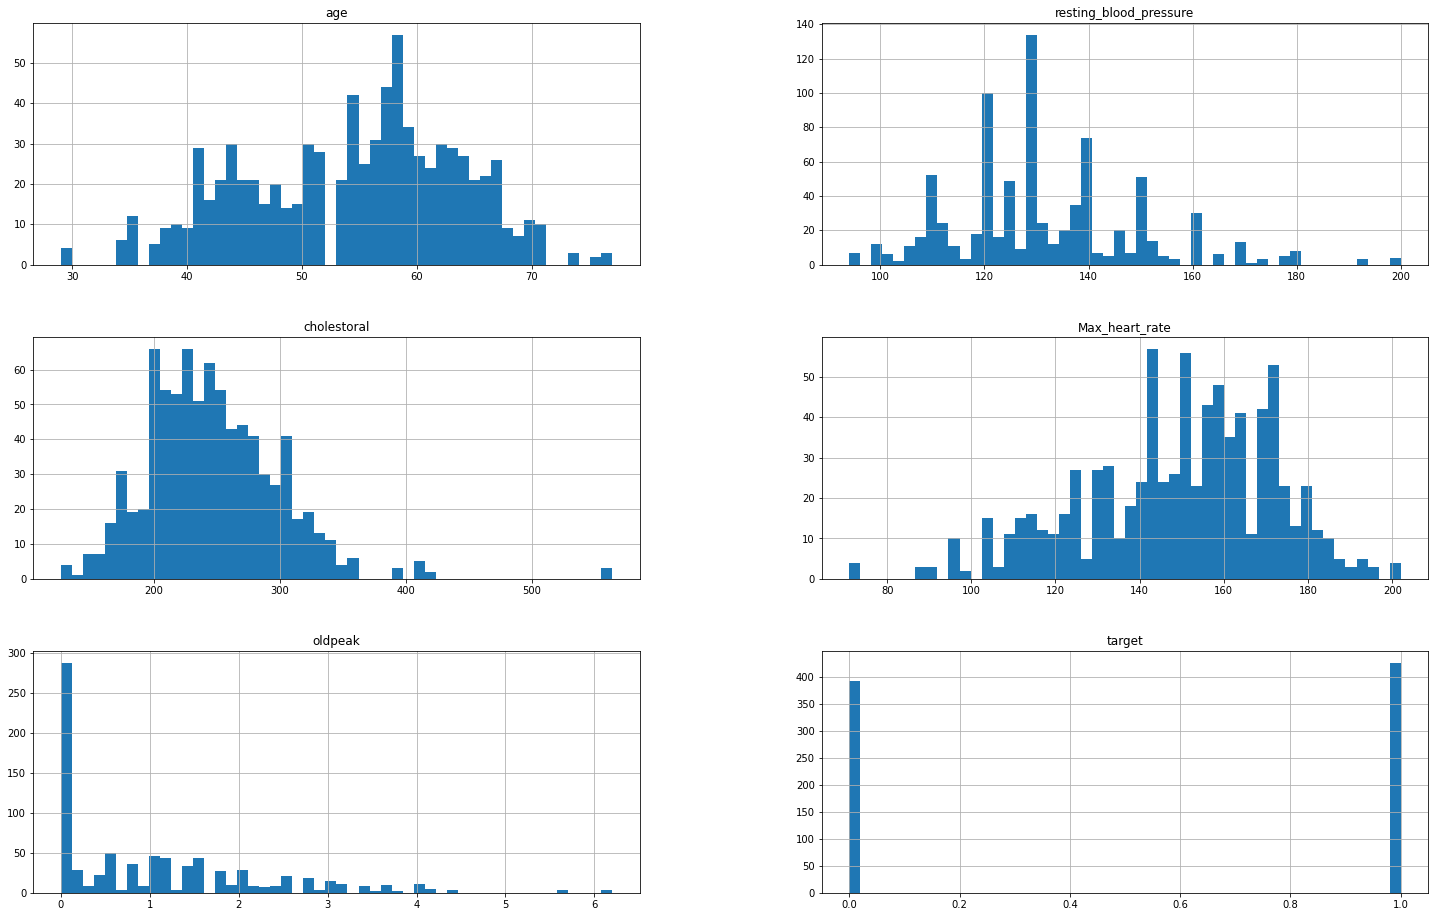

In [6]:
df_train.hist(bins=50,figsize=(25,16))

A histogram is one of the most frequently used data visualization techniques in machine learning. It represents the distribution of a continuous variable over a given interval or period of time. Histograms plot the data by dividing it into intervals called ‘bins’.

# Visualizing Outliers using boxplot

<AxesSubplot:xlabel='target', ylabel='age'>

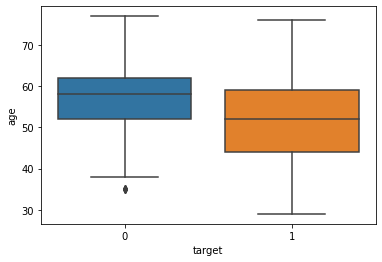

In [7]:
import seaborn as sns
sns.boxplot(x='target', y='age', data=df_train)
# condition vs age

<AxesSubplot:xlabel='target', ylabel='resting_blood_pressure'>

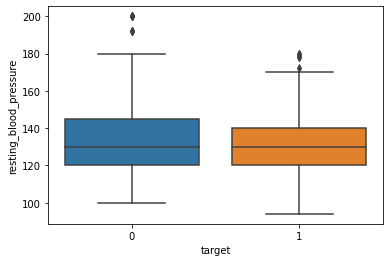

In [8]:
# condition vs trestbps
sns.boxplot(x="target", y="resting_blood_pressure", data=df_train)

<AxesSubplot:xlabel='target', ylabel='cholestoral'>

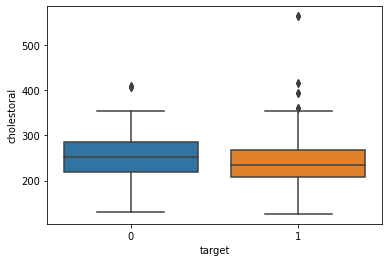

In [9]:
# condition vs trestbps
sns.boxplot(x="target", y="cholestoral", data=df_train)

<AxesSubplot:xlabel='target', ylabel='Max_heart_rate'>

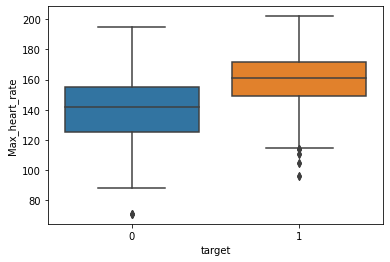

In [10]:
# condition vs trestbps
sns.boxplot(x="target", y="Max_heart_rate", data=df_train)

We can see in the above figures there is some outliers in the features. so, we have to take care of that. However there are some algorithm which can handle the outlier

# Looking at unique value in our data

In [11]:
df_train['chest_pain_type'].value_counts()

Typical angina      381
Non-anginal pain    239
Atypical angina     143
Asymptomatic         57
Name: chest_pain_type, dtype: int64

Number of Typical angina is 381, number of Non-anginal pain is 239, number of Atypical angina is 143, and number of asymptomatic is 57

In [12]:
df_train['rest_ecg'].value_counts()

Normal                          413
ST-T wave abnormality           397
Left ventricular hypertrophy     10
Name: rest_ecg, dtype: int64

Total number of restecg normal is 413, having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) is 397,showing probable or definite left ventricular hypertrophy by Estes' criteria is 10

In [13]:
df_train['slope'].value_counts()

Flat           384
Downsloping    377
Upsloping       59
Name: slope, dtype: int64

Number of upsloping is 384, number of flat slope is 377 and number of downsloping is 59

# Handling Missing/Null Values

We can find the total number of missing value in each feature using pandas function.

In [14]:
df_train.isna().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

<AxesSubplot:>

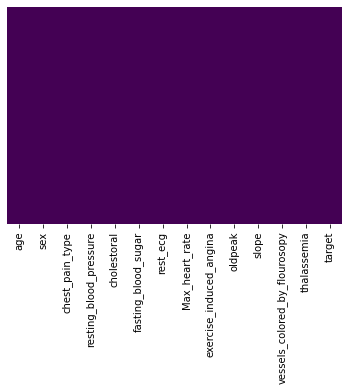

In [15]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Handling the Imbalance Data

In [16]:
df_train['target'].value_counts(normalize=True)

1    0.520732
0    0.479268
Name: target, dtype: float64

<AxesSubplot:xlabel='target', ylabel='count'>

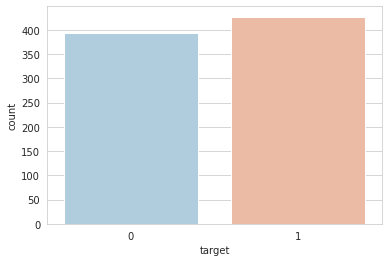

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df_train,palette='RdBu_r')

# Features Selection

Feature Selection is the process to automatically select those features which contribute most to our model

In [18]:
df1 = df_train[['age','resting_blood_pressure','cholestoral','Max_heart_rate','oldpeak','target']]

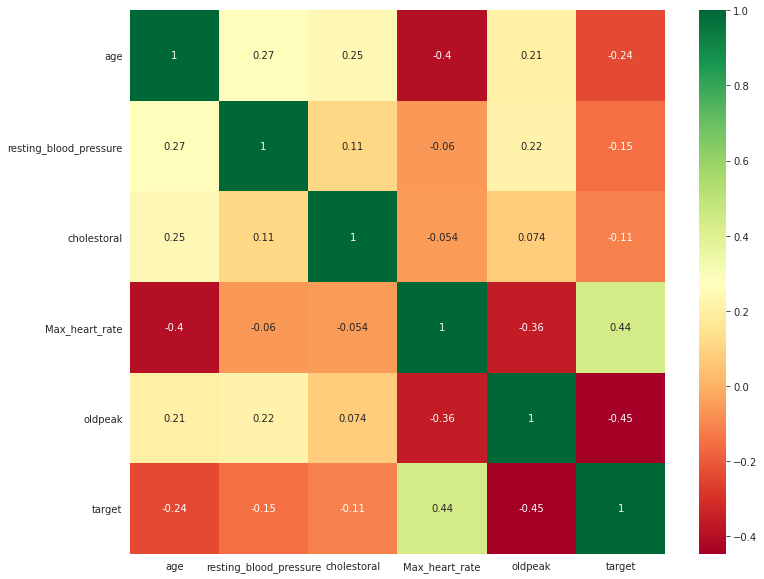

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.heatmap(df1.corr(), annot=True, cmap='RdYlGn')
plt.show()

We see our most of the features are not highly correlated with each others. we can see thalach is not correlated with other features and thal is correlated with target variable

# Calculating vif to remove multicollinearity

We can find the VIF of respective feature and remove the feature having VIF greater than 10. VIF score of an independent variable represents how well the variable is explained by other independent variables. VIF is calculated by keeping one independent variable as dependent and other independent variable

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(df1.values,i) for i in range (df1.shape[1])]
for i in range(0,5):
    print("The Vif for {} is {}".format(df1.columns[i],vif[i]))

The Vif for age is 35.90469067338722
The Vif for resting_blood_pressure is 53.637214841241864
The Vif for cholestoral is 23.8598596132461
The Vif for Max_heart_rate is 34.494621269606895
The Vif for oldpeak is 2.3995540046059585


# Converting Categorical features into numerical features

In [21]:
One_hot = pd.get_dummies(df_train[['sex', 'chest_pain_type', 'exercise_induced_angina', 'fasting_blood_sugar', 'rest_ecg', 'slope', 'thalassemia', 'vessels_colored_by_flourosopy']])
One_hot.head()

,sex_Female,sex_Male,chest_pain_type_Asymptomatic,chest_pain_type_Atypical angina,chest_pain_type_Non-anginal pain,chest_pain_type_Typical angina,exercise_induced_angina_No,exercise_induced_angina_Yes,fasting_blood_sugar_Greater than 120 mg/ml,fasting_blood_sugar_Lower than 120 mg/ml,...,slope_Upsloping,thalassemia_Fixed Defect,thalassemia_No,thalassemia_Normal,thalassemia_Reversable Defect,vessels_colored_by_flourosopy_Four,vessels_colored_by_flourosopy_One,vessels_colored_by_flourosopy_Three,vessels_colored_by_flourosopy_Two,vessels_colored_by_flourosopy_Zero
0,0,1,0,0,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,1,0,1,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,1,0,0,0,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
3,0,1,0,0,0,1,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0,1,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [22]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age','resting_blood_pressure','cholestoral','Max_heart_rate','oldpeak']
df_train[columns_to_scale] = standardScaler.fit_transform(df_train[columns_to_scale])

In [23]:
final_df_train = pd.concat([df_train[columns_to_scale],One_hot],axis=1)

In [24]:
final_df_train.columns

Index(['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate',
       'oldpeak', 'sex_Female', 'sex_Male', 'chest_pain_type_Asymptomatic',
       'chest_pain_type_Atypical angina', 'chest_pain_type_Non-anginal pain',
       'chest_pain_type_Typical angina', 'exercise_induced_angina_No',
       'exercise_induced_angina_Yes',
       'fasting_blood_sugar_Greater than 120 mg/ml',
       'fasting_blood_sugar_Lower than 120 mg/ml',
       'rest_ecg_Left ventricular hypertrophy', 'rest_ecg_Normal',
       'rest_ecg_ST-T wave abnormality', 'slope_Downsloping', 'slope_Flat',
       'slope_Upsloping', 'thalassemia_Fixed Defect', 'thalassemia_No',
       'thalassemia_Normal', 'thalassemia_Reversable Defect',
       'vessels_colored_by_flourosopy_Four',
       'vessels_colored_by_flourosopy_One',
       'vessels_colored_by_flourosopy_Three',
       'vessels_colored_by_flourosopy_Two',
       'vessels_colored_by_flourosopy_Zero'],
      dtype='object')

In [25]:
pd.set_option('display.max_columns',None)
final_df_train.head()


,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,sex_Female,sex_Male,chest_pain_type_Asymptomatic,chest_pain_type_Atypical angina,chest_pain_type_Non-anginal pain,chest_pain_type_Typical angina,exercise_induced_angina_No,exercise_induced_angina_Yes,fasting_blood_sugar_Greater than 120 mg/ml,fasting_blood_sugar_Lower than 120 mg/ml,rest_ecg_Left ventricular hypertrophy,rest_ecg_Normal,rest_ecg_ST-T wave abnormality,slope_Downsloping,slope_Flat,slope_Upsloping,thalassemia_Fixed Defect,thalassemia_No,thalassemia_Normal,thalassemia_Reversable Defect,vessels_colored_by_flourosopy_Four,vessels_colored_by_flourosopy_One,vessels_colored_by_flourosopy_Three,vessels_colored_by_flourosopy_Two,vessels_colored_by_flourosopy_Zero
0,-0.266323,-0.375922,-0.672008,0.820070,-0.054477,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0
1,-0.157620,0.463403,-0.843046,0.255053,1.718851,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1
2,1.690337,0.743179,-1.394169,-1.048833,1.296630,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
3,0.712007,0.911044,-0.843046,0.515830,-0.898919,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0
4,0.820710,0.351493,0.886339,-1.874627,0.705521,1,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0


In [26]:
x_train = final_df_train
y_train = df_train['target']

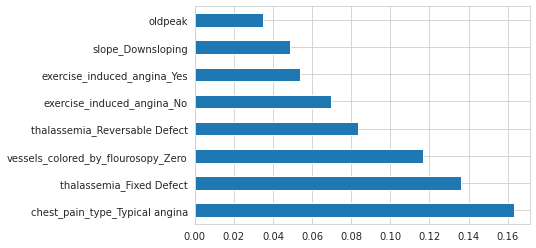

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier(criterion='entropy',max_depth=5)
model.fit(x_train,y_train)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

# Testing Data

In [29]:
import pandas as pd
df_test = pd.read_csv('HeartDisease_test.csv')
df_test.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,61,Male,Typical angina,140,207,Lower than 120 mg/ml,Normal,138,Yes,1.9,Downsloping,One,Reversable Defect,0
1,62,Female,Typical angina,140,268,Lower than 120 mg/ml,Normal,160,No,3.6,Upsloping,Two,Fixed Defect,0
2,60,Male,Typical angina,130,253,Lower than 120 mg/ml,ST-T wave abnormality,144,Yes,1.4,Downsloping,One,Reversable Defect,0
3,54,Male,Typical angina,140,239,Lower than 120 mg/ml,ST-T wave abnormality,160,No,1.2,Downsloping,Zero,Fixed Defect,1
4,61,Male,Typical angina,138,166,Lower than 120 mg/ml,Normal,125,Yes,3.6,Flat,One,Fixed Defect,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            205 non-null    float64
 1   sex                            205 non-null    object 
 2   chest_pain_type                205 non-null    object 
 3   resting_blood_pressure         205 non-null    float64
 4   cholestoral                    205 non-null    float64
 5   fasting_blood_sugar            205 non-null    object 
 6   rest_ecg                       205 non-null    object 
 7   Max_heart_rate                 205 non-null    float64
 8   exercise_induced_angina        205 non-null    object 
 9   oldpeak                        205 non-null    float64
 10  slope                          205 non-null    object 
 11  vessels_colored_by_flourosopy  205 non-null    object 
 12  thalassemia                    205 non-null    obj

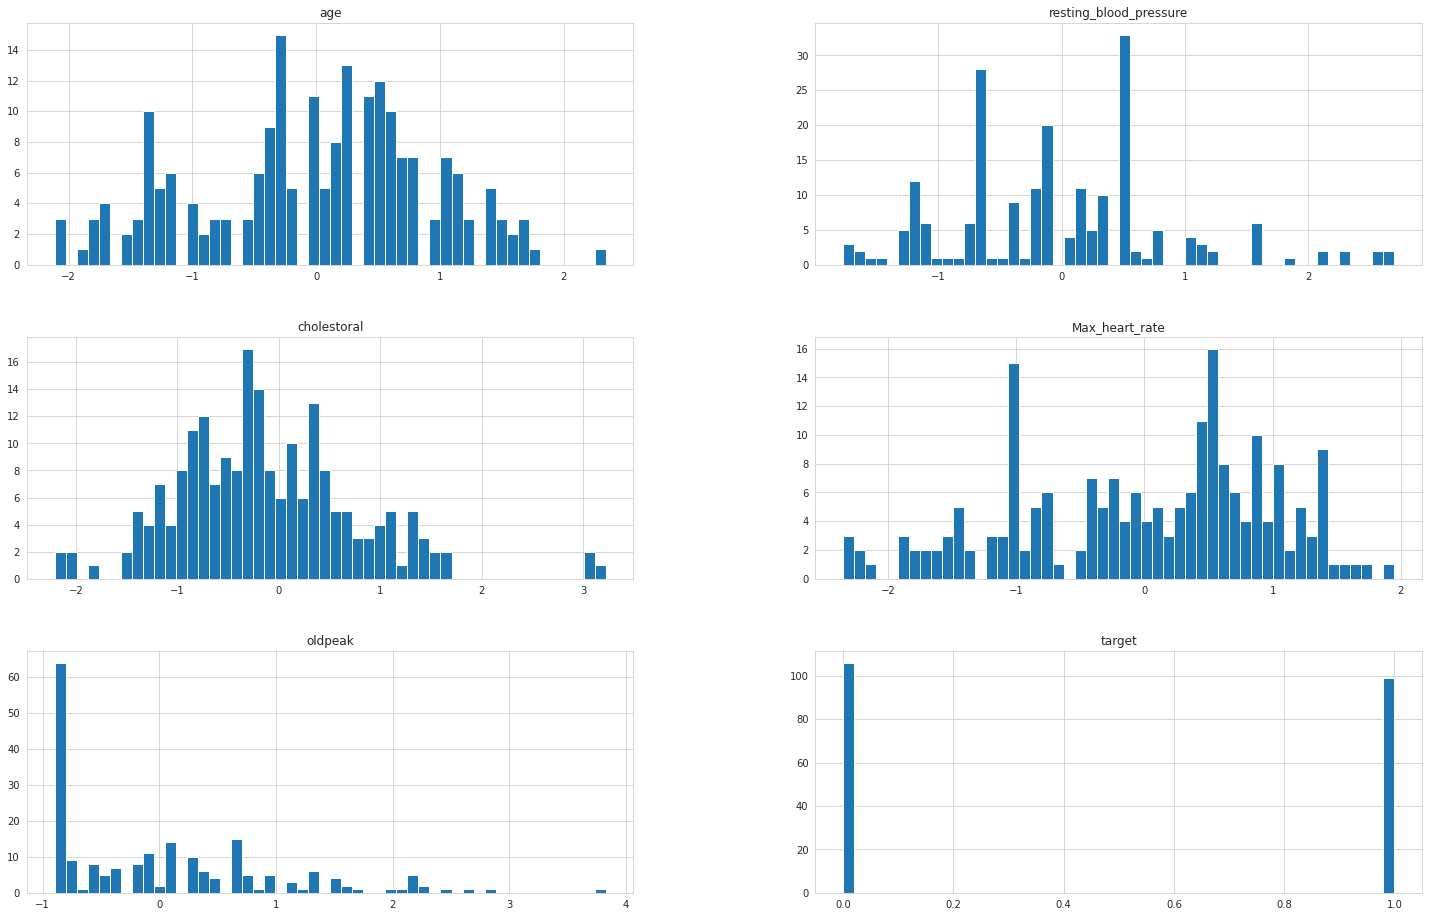

In [31]:
# Information about data
df_test.info()
df_test.describe()
df_test.hist(bins=50,figsize=(25,16))
One_hot = pd.get_dummies(df_test[['sex', 'chest_pain_type', 'exercise_induced_angina', 'fasting_blood_sugar', 'rest_ecg', 'slope', 'thalassemia', 'vessels_colored_by_flourosopy']])
One_hot.head()
columns_to_scale = ['age','resting_blood_pressure','cholestoral','Max_heart_rate','oldpeak']
df_test[columns_to_scale] = standardScaler.transform(df_test[columns_to_scale])
final_df_test = pd.concat([df_test[columns_to_scale],One_hot],axis=1)

In [32]:
x_test = final_df_test
y_test = df_test['target']

# Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
des_classifier = DecisionTreeClassifier().fit(x_train,y_train)
y_pred=des_classifier.predict(x_test)

<AxesSubplot:>

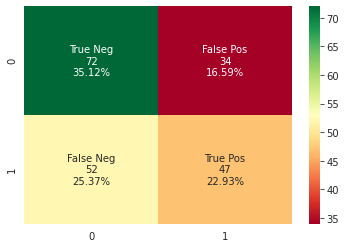

In [35]:
from sklearn.metrics import confusion_matrix
import numpy as np
cn_matrix = confusion_matrix(y_test,y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cn_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cn_matrix.flatten()/np.sum(cn_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cn_matrix, annot=labels, fmt="", cmap='RdYlGn')

In [60]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# choose the best splitter
splitter = ['best', 'random']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5,6, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'splitter':splitter,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}

In [62]:
destree_classifier=DecisionTreeClassifier()
des_randomcv=RandomizedSearchCV(estimator=destree_classifier,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the Descision Tree model
des_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 6, 10, 14],
                                        'splitter': ['best', 'random']},
                   random_state=100, verbose=2)

/home/manoj/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warning

[CV] END criterion=entropy, max_depth=890, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=340, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=340, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=670, max_features=sqrt, min_samples_leaf=8, min_samples_split=14, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=780, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max

[CV] END criterion=gini, max_depth=230, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=670, max_features=sqrt, min_samples_leaf=4, min_samples_split=14, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=670, max_features=sqrt, min_samples_leaf=4, min_samples_split=14, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=560, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=560, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=670, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=780, max_features=log2, min_samples_leaf=6, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=780, m

/home/manoj/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warning

[CV] END criterion=entropy, max_depth=230, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=670, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1000, max_features=auto, min_samples_leaf=6, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1000, max_features=auto, min_samples_leaf=2, min_samples_split=14, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1000, max_features=auto, min_samples_leaf=2, min_samples_split=14, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=780, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=780, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=780, max_fea

[CV] END criterion=entropy, max_depth=1000, max_features=auto, min_samples_leaf=6, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=450, max_features=auto, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=890, max_features=auto, min_samples_leaf=8, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=230, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=890, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=120, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=890, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=230, m

/home/manoj/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warning

[CV] END criterion=entropy, max_depth=890, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=340, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=670, max_features=sqrt, min_samples_leaf=8, min_samples_split=14, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=780, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=340, max_features=log2, min_samples_leaf=6, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_d

/home/manoj/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warning

In [63]:
des_randomcv.best_params_

{'splitter': 'best',
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 780,
 'criterion': 'gini'}

In [65]:
from sklearn.tree import DecisionTreeClassifier
des_classifier = DecisionTreeClassifier(splitter= 'best',min_samples_split=2,min_samples_leaf= 1,
                                        max_features='sqrt', max_depth= 780,criterion='gini').fit(x_train,y_train)
y_pred=des_classifier.predict(x_test)

<AxesSubplot:>

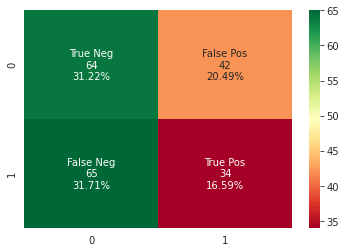

[CV] END criterion=gini, max_depth=230, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=560, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=340, max_features=sqrt, min_samples_leaf=2, min_samples_split=14, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=890, max_features=log2, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_dept

/home/manoj/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warning

In [66]:
from sklearn.metrics import confusion_matrix
import numpy as np
cn_matrix = confusion_matrix(y_test,y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cn_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cn_matrix.flatten()/np.sum(cn_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cn_matrix, annot=labels, fmt="", cmap='RdYlGn')

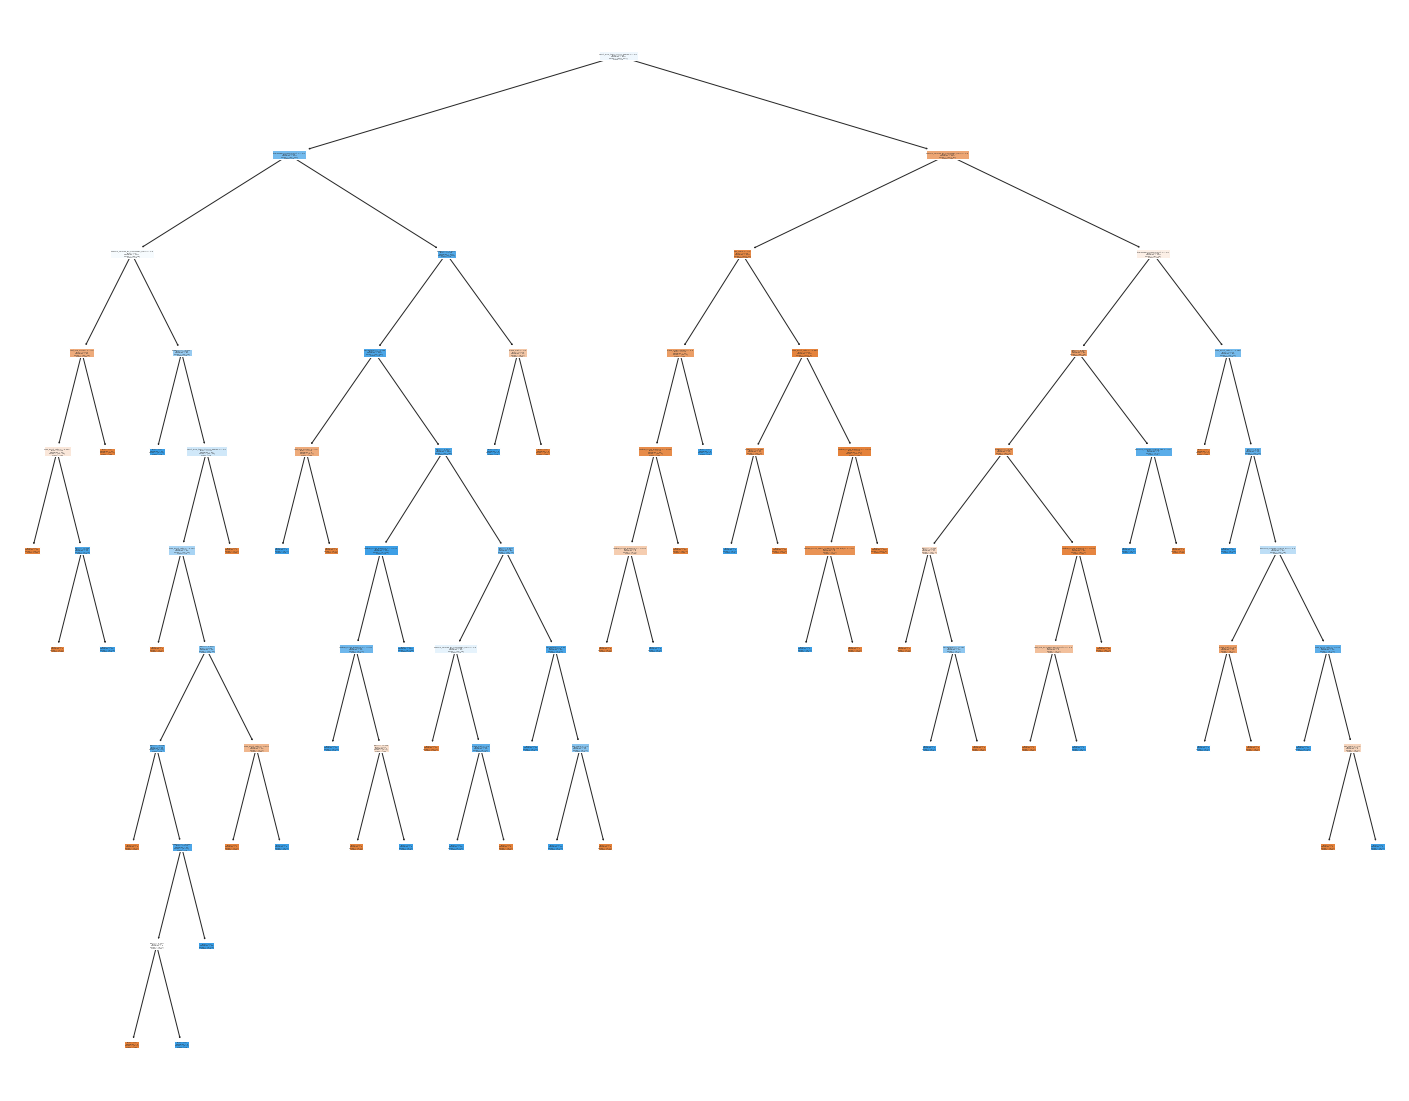

In [37]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(des_classifier, 
                   feature_names=x_train.columns,  
                   class_names=['yes','no'],
                   filled=True)

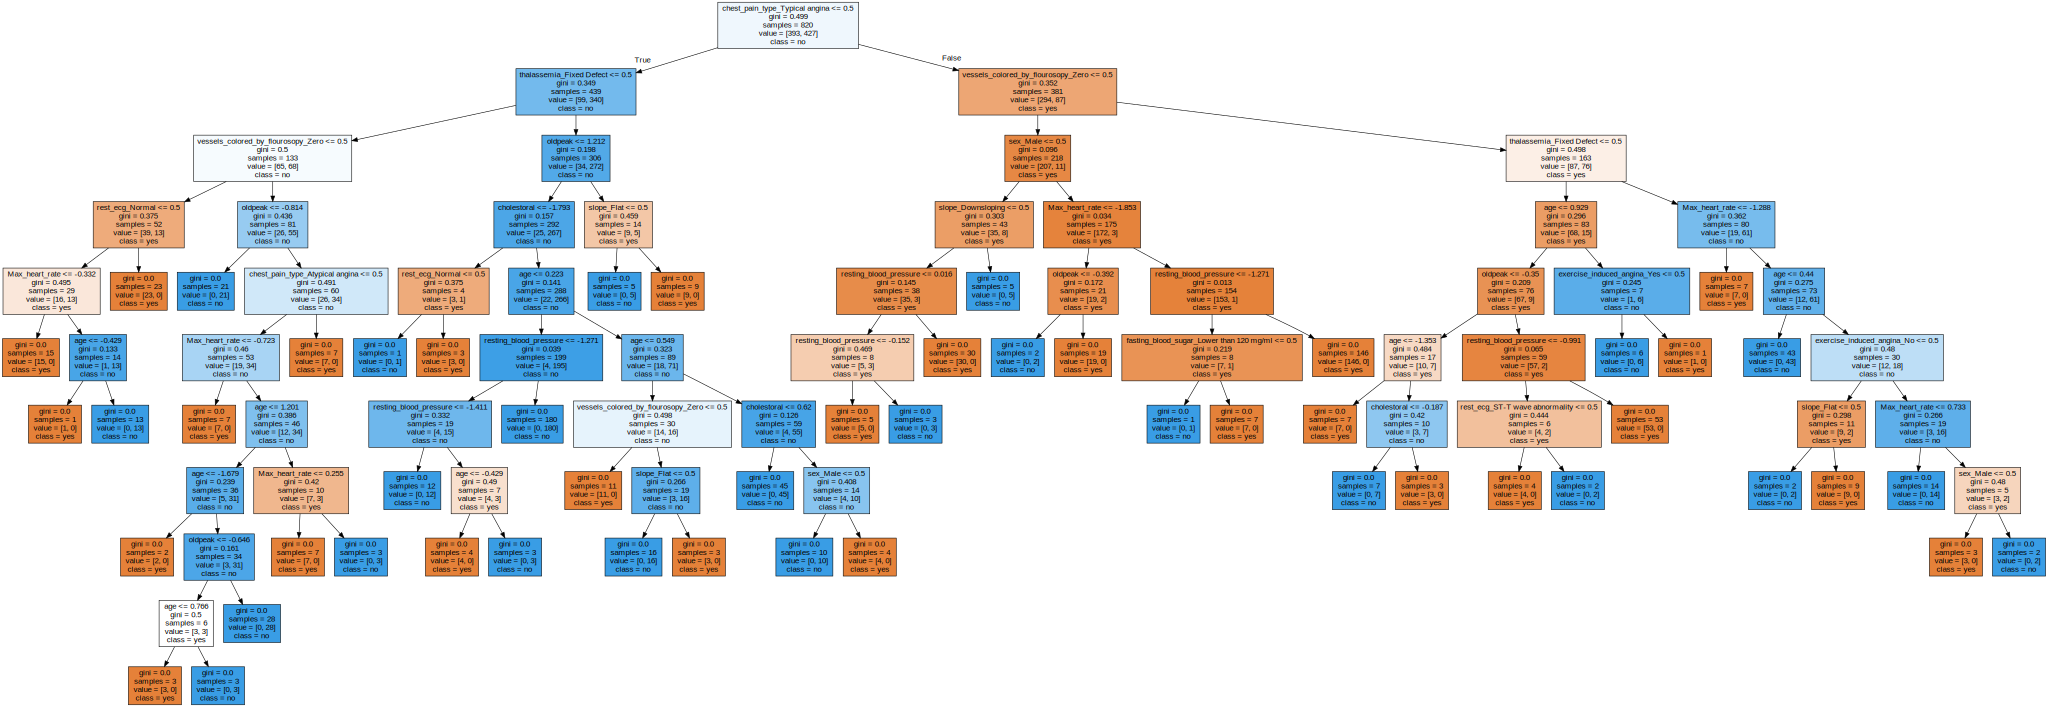

In [39]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(des_classifier, out_file=None, 
                                feature_names=x_train.columns,  
                                class_names=['yes','no'],
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree_graphivz")
graph

# Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(x_train,y_train)

In [41]:
y_pred=rf_classifier.predict(x_test)

In [47]:
# Save the trained model as a pickle string.
import pickle
pickle.dump(rf_classifier,open('classifier_model1.pkl','wb'))

<AxesSubplot:>

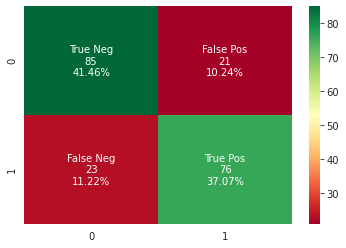

In [43]:
from sklearn.metrics import confusion_matrix
import numpy as np
cn_matrix = confusion_matrix(y_test,y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cn_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cn_matrix.flatten()/np.sum(cn_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cn_matrix, annot=labels, fmt="", cmap='RdYlGn')

In [44]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}

In [45]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [46]:
rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 120,
 'criterion': 'entropy'}

In [47]:
rf_classifier=RandomForestClassifier(n_estimators= 600,min_samples_split= 2,min_samples_leaf= 1,max_features= 'sqrt',max_depth= 120,criterion= 'entropy').fit(x_train,y_train)
y_pred=rf_classifier.predict(x_test)

<AxesSubplot:>

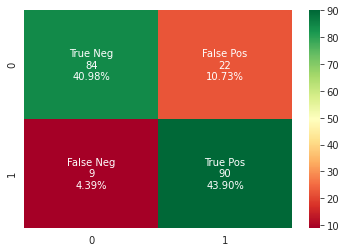

In [48]:
from sklearn.metrics import confusion_matrix
y_pred = rf_classifier.predict(x_test)
cn_matrix = confusion_matrix(y_test,y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cn_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cn_matrix.flatten()/np.sum(cn_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cn_matrix, annot=labels, fmt="", cmap='RdYlGn')

In [49]:
rf_classifier.score(x_test,y_test)

0.848780487804878

# Xgboost Classifier

<AxesSubplot:>

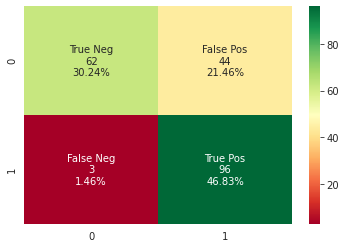

[CV] END criterion=gini, max_depth=340, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=2000; total time=   5.7s
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=   4.1s
[CV] END criterion=entropy, max_depth=230, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END criterion=gini, max_depth=890, max_features=sqrt, min_samples_leaf=6, min_samples_split=14, n_estimators=600; total time=   1.5s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=200; total time=   0.5s
[CV] END criterion=entropy, max_depth=450, max_features=auto, min_samples_leaf=1, min_samples_split=14, n_estimators=1000; total time=   3.0s
[CV] END criterion=entropy, max_depth=890, max_features=auto, min_samples_leaf=8, min_samples_split=14, n_estimators=800; total time=   2.2s
[CV] END criterion=e

/home/manoj/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the defaul

[CV] END criterion=gini, max_depth=120, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=1400; total time=   3.8s
[CV] END criterion=gini, max_depth=340, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400; total time=   3.8s
[CV] END criterion=gini, max_depth=890, max_features=auto, min_samples_leaf=8, min_samples_split=14, n_estimators=600; total time=   1.6s
[CV] END criterion=gini, max_depth=1000, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   1.6s
[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=800; total time=   2.0s
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=1600; total time=   4.2s
[CV] END criterion=gini, max_depth=120, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.9s
[CV] END criterion=gini, max_

/home/manoj/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the defaul

[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=14, n_estimators=200; total time=   0.5s
[CV] END criterion=gini, max_depth=670, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   1.8s
[CV] END criterion=entropy, max_depth=670, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=2000; total time=   5.4s
[CV] END criterion=gini, max_depth=670, max_features=sqrt, min_samples_leaf=2, min_samples_split=14, n_estimators=400; total time=   1.0s
[CV] END criterion=gini, max_depth=670, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   1.0s
[CV] END criterion=gini, max_depth=890, max_features=sqrt, min_samples_leaf=6, min_samples_split=14, n_estimators=600; total time=   1.5s
[CV] END criterion=gini, ma

/home/manoj/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the defaul

[CV] END criterion=gini, max_depth=340, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=2000; total time=   5.4s
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=   3.9s
[CV] END criterion=entropy, max_depth=230, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END criterion=gini, max_depth=230, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=1800; total time=   4.9s
[CV] END criterion=entropy, max_depth=340, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END criterion=entropy, max_depth=890, max_features=auto, min_samples_leaf=8, min_samples_split=14, n_estimators=800; total time=   2.2s
[CV] END criterion=entropy, max_depth=1000, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   2.1s
[CV] END criterio

/home/manoj/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the defaul

560, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   5.9s
[CV] END criterion=entropy, max_depth=780, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   5.0s
[CV] END criterion=gini, max_depth=1000, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=1400; total time=   4.2s
[CV] END criterion=entropy, max_depth=230, max_features=log2, min_samples_leaf=8, min_samples_split=14, n_estimators=1600; total time=   5.1s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=2000; total time=   7.6s
[CV] END criterion=gini, max_depth=890, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   2.2s
[CV] END criterion=gini, max_depth=670, max_features=log2, min_samples_leaf=1, min_samples_split=14, n_estimators=1600; total time=   5.6s
[CV] END criterion=entropy, max_depth=10, max_features=auto,

`max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 

[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=2000; total time=   5.4s
[CV] END criterion=entropy, max_depth=120, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   1.7s
[CV] END criterion=gini, max_depth=890, max_features=auto, min_samples_leaf=8, min_samples_split=14, n_estimators=600; total time=   1.6s
[CV] END criterion=gini, max_depth=1000, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   1.6s
[CV] END criterion=gini, max_depth=670, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=800; total time=   2.1s
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=1600; total time=   4.2s
[CV] END criterion=gini, max_depth=120, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   1.0s
[CV] END criterion=gini, 

/home/manoj/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/manoj/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the defaul

In [50]:
import xgboost
xgb_classifier=xgboost.XGBClassifier()
xgb_classifier.fit(x_train,y_train)
y_pred = xgb_classifier.predict(x_test)

cn_matrix = confusion_matrix(y_test,y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cn_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cn_matrix.flatten()/np.sum(cn_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cn_matrix, annot=labels, fmt="", cmap='RdYlGn')

In [51]:
xgb_classifier.score(x_test,y_test)

0.7707317073170732

In [52]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [53]:
random_search=RandomizedSearchCV(xgb_classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [54]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [55]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 12,
 'learning_rate': 0.25,
 'gamma': 0.3,
 'colsample_bytree': 0.7}

In [56]:
xgb_classifier=xgboost.XGBClassifier(min_child_weight=3,max_depth=12,learning_rate=0.25,gamma=0.3,colsample_bytree=0.7)

In [57]:
xgb_classifier.fit(x_train,y_train)
y_pred = xgb_classifier.predict(x_test)

<AxesSubplot:>

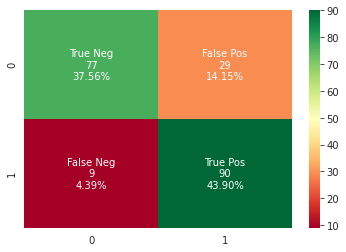

In [58]:
cn_matrix = confusion_matrix(y_test,y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cn_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cn_matrix.flatten()/np.sum(cn_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cn_matrix, annot=labels, fmt="", cmap='RdYlGn')

In [59]:
xgb_classifier.score(x_test,y_test)

0.8146341463414634

[CV 1/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.25, max_depth=12, min_child_weight=3;, score=0.999 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5;, score=0.960 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.15, max_depth=10, min_child_weight=5;, score=0.972 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.15, max_depth=10, min_child_weight=5;, score=0.985 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5;, score=0.955 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=7;, score=0.978 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5;, score=0.972 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=5, min_